<a href="https://colab.research.google.com/github/Fauzan-Al1/Deep_Learning/blob/main/Deep_Learning_Week_3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from keras.models import Sequential
from keras.layers import Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28))) #index_flat = i * (jumlah kolom) + j


In [12]:
import numpy as np
# Bikin dummy image: gradient dari 0 (gelap) ke 255 (terang)
dummy_input = np.linspace(0, 255, num=28*28).reshape(28, 28).astype(np.float32)
# Tambah batch dimension, jadi shape-nya (1, 28, 28)
dummy_input = np.expand_dims(dummy_input, axis=0)

# Jalanin model buat ngeliat output flatten
flattened_output = model.predict(dummy_input)
print(flattened_output[0][:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[0.        0.3256705 0.651341  0.9770115 1.302682  1.6283525 1.954023
 2.2796936 2.605364  2.9310346]


In [13]:
print("Input sebelum flatten:", dummy_input[0][0][:10])

Input sebelum flatten: [0.        0.3256705 0.651341  0.9770115 1.302682  1.6283525 1.954023
 2.2796936 2.605364  2.9310346]


In [14]:
from keras.layers import Dense
model.add(Dense(512, activation='relu'))

In [15]:
import numpy as np

def relu(x):
    """
    Fungsi ReLU:
    - Kalau x < 0, jadi 0
    - Kalau x == 0, tetap 0
    - Kalau x > 0, jadi x
    """
    return np.where(x > 0, x, 0)

# Contoh input: ada negatif, 0, dan positif
input_vector = np.array([-5.0, -1.0, 0.0, 2.0, 5.0])
output = relu(input_vector)

print("Input:", input_vector)
print("Output setelah ReLU:", output)

Input: [-5. -1.  0.  2.  5.]
Output setelah ReLU: [0. 0. 0. 2. 5.]


In [16]:
import numpy as np

def softmax(x):
    """
    Fungsi softmax buat ngeubah input vector jadi probabilitas.

    Rumus:
    softmax(x)_i = exp(x_i) / sum(exp(x))

    Pake trick subtract np.max(x) buat stabilitas numerik.
    """
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

# Contoh input vector
input_vector = np.array([2.0, 1.0, 0.1])
output = softmax(input_vector)

print("Input:", input_vector)
print("Output setelah softmax:", output)

Input: [2.  1.  0.1]
Output setelah softmax: [0.65900114 0.24243297 0.09856589]


In [17]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# Imports a Flatten layer to convert the image matrix into a vector
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [21]:
model_mlp = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [22]:
model_mlp.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [23]:
history_mlp = model_mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8436 - loss: 0.5294 - val_accuracy: 0.9634 - val_loss: 0.1268
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9601 - loss: 0.1290 - val_accuracy: 0.9731 - val_loss: 0.0924
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9743 - loss: 0.0831 - val_accuracy: 0.9747 - val_loss: 0.0855
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9820 - loss: 0.0599 - val_accuracy: 0.9768 - val_loss: 0.0762
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9853 - loss: 0.0462 - val_accuracy: 0.9768 - val_loss: 0.0793
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9858 - loss: 0.0421 - val_accuracy: 0.9777 - val_loss: 0.0781
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9879 - loss: 0.0367 - val_accuracy: 0.9780 - val_loss: 0.0829
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9903 - loss: 0.0287 - val

In [24]:
score = model_mlp.evaluate(x_test, y_test, verbose=0)
print('MLP Test loss:', score[0])
print('MLP Test accuracy:', score[1])

MLP Test loss: 0.06539501994848251
MLP Test accuracy: 0.9815000295639038


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [28]:
model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [30]:
history_cnn = model_cnn.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.8272 - loss: 0.5996 - val_accuracy: 0.9763 - val_loss: 0.0819
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.9753 - loss: 0.0822 - val_accuracy: 0.9837 - val_loss: 0.0564
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 105ms/step - accuracy: 0.9828 - loss: 0.0558 - val_accuracy: 0.9852 - val_loss: 0.0491
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.9887 - loss: 0.0387 - val_accuracy: 0.9874 - val_loss: 0.0450
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.9891 - loss: 0.0345 - val_accuracy: 0.9891 - val_loss: 0.0372
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.9917 - loss: 0.0252 - val_accuracy: 0.9883 - val_loss: 0.0402
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.9908 - loss: 0.0264 - val_accuracy: 0.9898 - val_loss: 0.0384
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9933 - loss: 0

In [31]:
score = model_cnn.evaluate(x_test, y_test, verbose=0)
print('CNN Test loss:', score[0])
print('CNN Test accuracy:', score[1])

CNN Test loss: 0.026532858610153198
CNN Test accuracy: 0.991100013256073


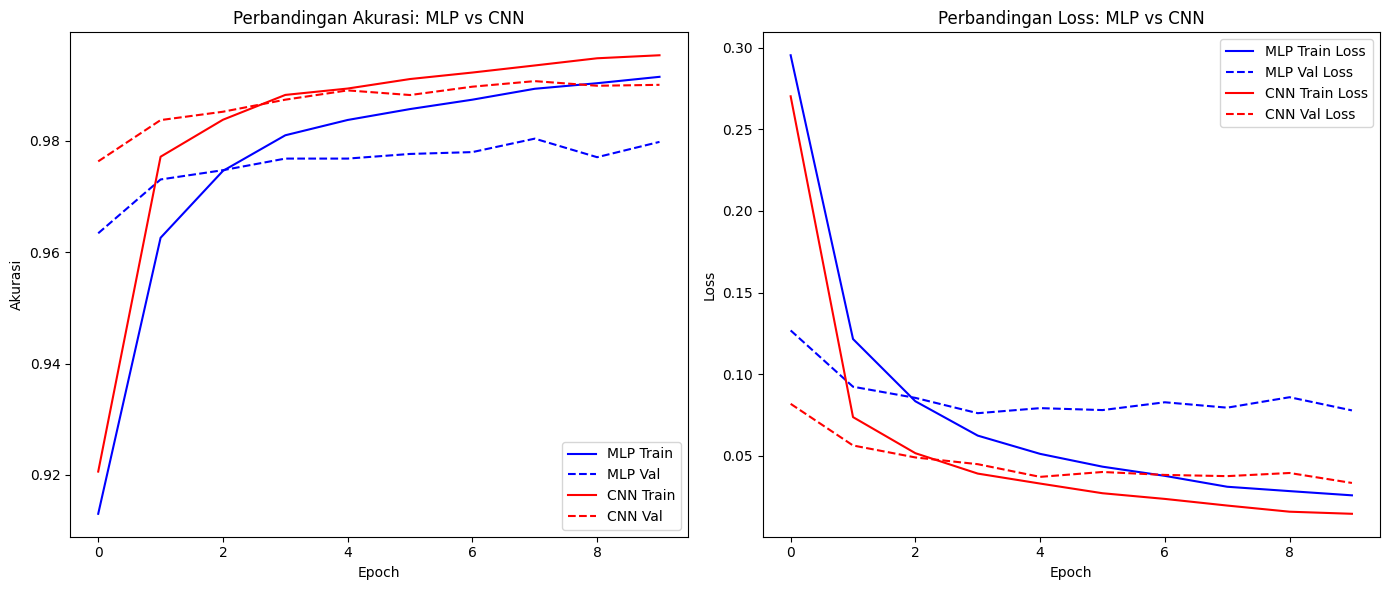

In [32]:
import matplotlib.pyplot as plt

# Grafik Perbandingan Akurasi
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['accuracy'], 'b-', label='MLP Train')
plt.plot(history_mlp.history['val_accuracy'], 'b--', label='MLP Val')
plt.plot(history_cnn.history['accuracy'], 'r-', label='CNN Train')
plt.plot(history_cnn.history['val_accuracy'], 'r--', label='CNN Val')
plt.title('Perbandingan Akurasi: MLP vs CNN')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Perbandingan Loss
plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['loss'], 'b-', label='MLP Train Loss')
plt.plot(history_mlp.history['val_loss'], 'b--', label='MLP Val Loss')
plt.plot(history_cnn.history['loss'], 'r-', label='CNN Train Loss')
plt.plot(history_cnn.history['val_loss'], 'r--', label='CNN Val Loss')
plt.title('Perbandingan Loss: MLP vs CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
Inputvector = [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Inputvector

[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]